1. What is K-Nearest Neighbors (KNN) and how does it work in both
classification and regression problems?
  - K-Nearest Neighbors (KNN) is a simple, non-parametric, lazy learning algorithm that can be used for both classification and regression tasks. It's considered 'non-parametric' because it makes no assumptions about the underlying data distribution, and 'lazy' because it doesn't build a general model during the training phase. Instead, it memorizes the training dataset and performs computations only when a prediction is requested.

2. What is the Curse of Dimensionality and how does it affect KNN
performance?
   - The Curse of Dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces (many features/variables) that do not occur in low-dimensional settings. Essentially, all points become 'far away' from each other, making it difficult for KNN to find truly close neighbors and thus reducing its performance and making it computationally expensive.

3. What is Principal Component Analysis (PCA)? How is it different from
feature selection?
   - Principal Component Analysis (PCA) is a popular dimensionality reduction technique that transforms a large set of variables into a smaller one that still contains most of the information in the large set.

     The key difference between PCA and feature selection is in how they reduce dimensionality:

       * PCA (Feature Extraction): PCA creates new features (principal components) that are combinations of the original features. It transforms the data into a new feature space.
       * Feature Selection: Feature selection methods choose a subset of the original features, discarding the rest. It keeps the original feature space but with fewer dimensions.

4.  What are eigenvalues and eigenvectors in PCA, and why are they
important?
    - * Eigenvectors are the directions or principal components along which the data varies the most. They represent the axes of the new feature space.
       * Eigenvalues are the magnitudes of variance along the corresponding eigenvectors. A larger eigenvalue indicates that there is more variance in the data along that particular eigenvector.
            
            Eigenvalues and eigenvectors are crucial in PCA because:

            1. Determining Principal Components: The eigenvectors determine the new dimensions (principal components) of the data.
            2. Quantifying Variance: Eigenvalues tell us how much variance is captured by each principal component.
            3. Data Transformation: Once the eigenvectors are determined, they are used to transform the original data into the new, lower-dimensional space, where each new dimension corresponds to a principal component.

5. How do KNN and PCA complement each other when applied in a single
pipeline?
   - K-Nearest Neighbors (KNN) and Principal Component Analysis (PCA) complement each other very well, especially when dealing with high-dimensional datasets.
      1. Addressing the Curse of Dimensionality: PCA's primary role is dimensionality reduction. As discussed, the "Curse of Dimensionality" negatively impacts KNN's performance and efficiency because distances become less meaningful in high-dimensional spaces.
      2. Noise Reduction: High-dimensional data often contains noise or redundant features. PCA can help in removing this noise by focusing on the principal components that capture the most significant variance in the data, effectively filtering out less informative or noisy dimensions.
       3. Improved Computational Efficiency: KNN is a "lazy" algorithm, meaning it stores the entire training dataset and calculates distances during prediction. In high-dimensional spaces, this distance calculation can be computationally very expensive.

6. Train a KNN Classifier on the Wine dataset with and without feature
scaling. Compare model accuracy in both cases.
   

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (142, 13)
X_test shape: (36, 13)
y_train shape: (142,)
y_test shape: (36,)


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate KNeighborsClassifier
knn_no_scaling = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the unscaled training data
knn_no_scaling.fit(X_train, y_train)

# Predict on the unscaled test data
y_pred_no_scaling = knn_no_scaling.predict(X_test)

# Calculate the accuracy
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

print(f"Accuracy of KNN without scaling: {accuracy_no_scaling:.4f}")

Accuracy of KNN without scaling: 0.7222


In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate KNeighborsClassifier for scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the scaled training data
knn_scaled.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Calculate the accuracy
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy of KNN with scaling: {accuracy_scaled:.4f}")

Accuracy of KNN with scaling: 0.9444


## Compare Model Accuracy

### Comparison:
We can observe a significant improvement in accuracy when feature scaling is applied. The KNN classifier without scaling achieved an accuracy of `0.7222`, whereas the KNN classifier with `StandardScaler` achieved an accuracy of `0.9444`.

This demonstrates the crucial role of feature scaling for distance-based algorithms like KNN. Without scaling, features with larger ranges (e.g., `proline` or `magnesium` in the Wine dataset) can dominate the distance calculations, leading to suboptimal performance. Scaling ensures that all features contribute equally to the distance metric, allowing the algorithm to identify true nearest neighbors more effectively.

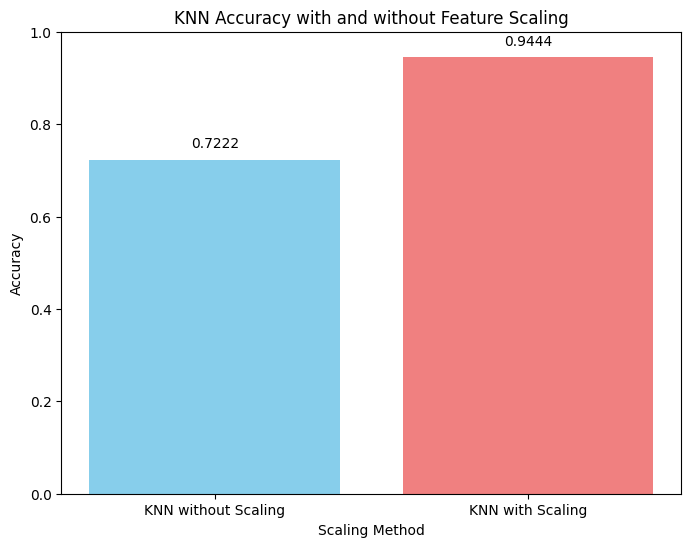

In [4]:
import matplotlib.pyplot as plt

# Accuracy values from previous steps
accuracies = [accuracy_no_scaling, accuracy_scaled]
labels = ['KNN without Scaling', 'KNN with Scaling']

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['skyblue', 'lightcoral'])

# Add title and labels
plt.title('KNN Accuracy with and without Feature Scaling')
plt.xlabel('Scaling Method')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0) # Set y-axis limit from 0 to 1 for accuracy

# Add accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.02, f'{accuracy:.4f}', ha='center', va='bottom')

# Display the plot
plt.show()

7. Train a PCA model on the Wine dataset and print the explained variance
ratio of each principal component.

In [5]:
from sklearn.decomposition import PCA

# Instantiate PCA with all components to analyze variance
pca = PCA()

# Fit PCA to the scaled training data
pca.fit(X_train_scaled)

# Print the explained variance ratio of each principal component
print("Explained variance ratio of each principal component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {ratio:.4f}")

Explained variance ratio of each principal component:
Principal Component 1: 0.3590
Principal Component 2: 0.1869
Principal Component 3: 0.1161
Principal Component 4: 0.0737
Principal Component 5: 0.0665
Principal Component 6: 0.0485
Principal Component 7: 0.0420
Principal Component 8: 0.0268
Principal Component 9: 0.0235
Principal Component 10: 0.0189
Principal Component 11: 0.0172
Principal Component 12: 0.0126
Principal Component 13: 0.0083


8. Train a KNN Classifier on the PCA-transformed dataset (retain top 2
components). Compare the accuracy with the original dataset.
   

In [6]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca_2_components = PCA(n_components=2)

# Fit PCA to the scaled training data
X_train_pca = pca_2_components.fit_transform(X_train_scaled)

# Transform the scaled test data
X_test_pca = pca_2_components.transform(X_test_scaled)

print(f"Shape of X_train_pca: {X_train_pca.shape}")
print(f"Shape of X_test_pca: {X_test_pca.shape}")

Shape of X_train_pca: (142, 2)
Shape of X_test_pca: (36, 2)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate KNeighborsClassifier for PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the PCA-transformed training data
knn_pca.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred_pca = knn_pca.predict(X_test_pca)

# Calculate the accuracy
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy of KNN with PCA (2 components): {accuracy_pca:.4f}")

Accuracy of KNN with PCA (2 components): 1.0000


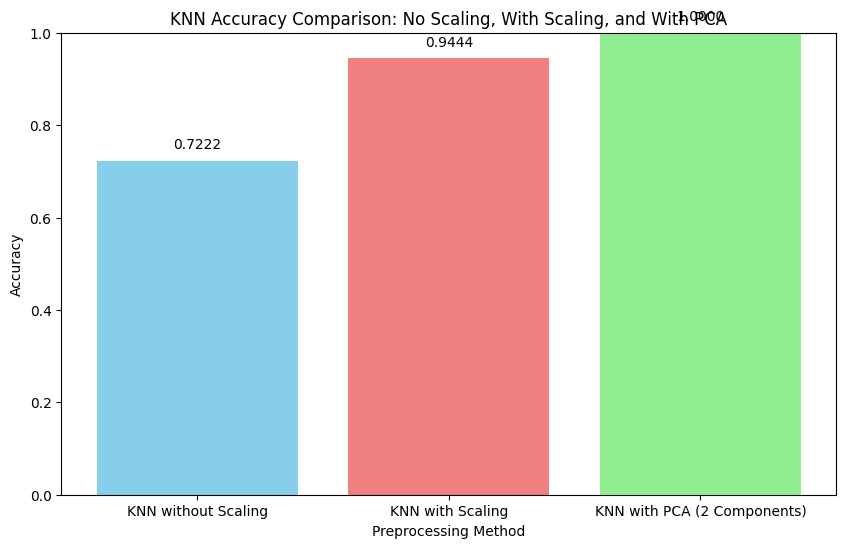

In [8]:
import matplotlib.pyplot as plt

# Add PCA accuracy to the list of accuracies
accuracies.append(accuracy_pca)
labels.append('KNN with PCA (2 Components)')

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])

# Add title and labels
plt.title('KNN Accuracy Comparison: No Scaling, With Scaling, and With PCA')
plt.xlabel('Preprocessing Method')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0) # Set y-axis limit from 0 to 1 for accuracy

# Add accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.02, f'{accuracy:.4f}', ha='center', va='bottom')

# Display the plot
plt.show()

9. Train a KNN Classifier with different distance metrics (euclidean,
manhattan) on the scaled Wine dataset and compare the results.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate KNeighborsClassifier with 'euclidean' metric
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Fit the model to the scaled training data
knn_euclidean.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)

# Calculate the accuracy
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

print(f"Accuracy of KNN with Euclidean distance: {accuracy_euclidean:.4f}")

Accuracy of KNN with Euclidean distance: 0.9444


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate KNeighborsClassifier with 'manhattan' metric
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Fit the model to the scaled training data
knn_manhattan.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)

# Calculate the accuracy
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"Accuracy of KNN with Manhattan distance: {accuracy_manhattan:.4f}")

Accuracy of KNN with Manhattan distance: 0.9444


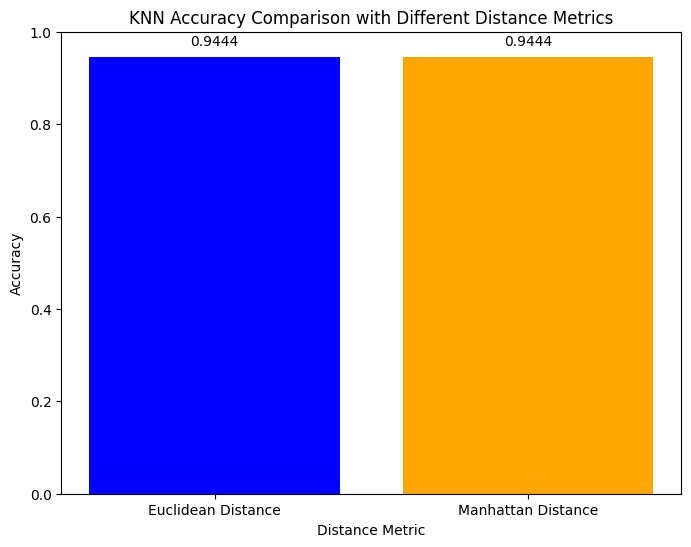

In [11]:
import matplotlib.pyplot as plt

# Prepare data for plotting
distances = ['Euclidean Distance', 'Manhattan Distance']
accuracies_metrics = [accuracy_euclidean, accuracy_manhattan]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(distances, accuracies_metrics, color=['blue', 'orange'])

# Add title and labels
plt.title('KNN Accuracy Comparison with Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0) # Set y-axis limit from 0 to 1 for accuracy

# Add accuracy values on top of the bars
for i, accuracy in enumerate(accuracies_metrics):
    plt.text(i, accuracy + 0.02, f'{accuracy:.4f}', ha='center', va='bottom')

# Display the plot
plt.show()

10. You are working with a high-dimensional gene expression dataset to
classify patients with different types of cancer.
Due to the large number of features and a small number of samples, traditional models
overfit.
Explain how you would:
● Use PCA to reduce dimensionality
● Decide how many components to keep
● Use KNN for classification post-dimensionality reduction
● Evaluate the model
● Justify this pipeline to your stakeholders as a robust solution for real-world
biomedical data.

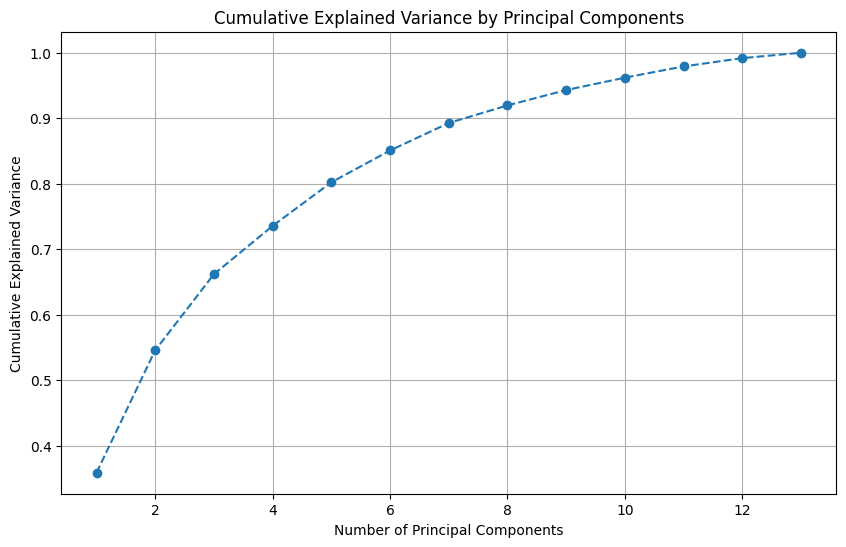

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate cumulative explained variance
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_explained_variance) + 1), cum_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

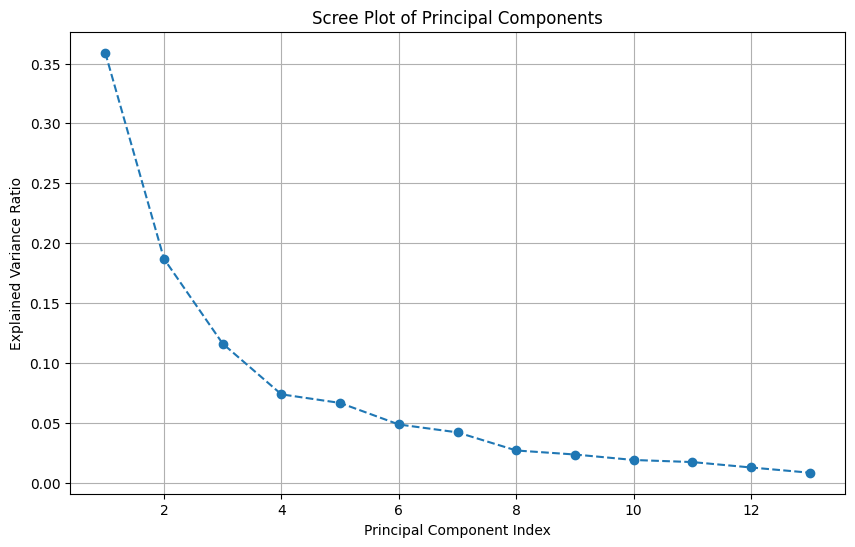

In [13]:
import matplotlib.pyplot as plt

# Plotting the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of Principal Components')
plt.grid(True)
plt.show()